<a href="https://colab.research.google.com/github/PGrubisic/Racunalni_vid_labovi/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

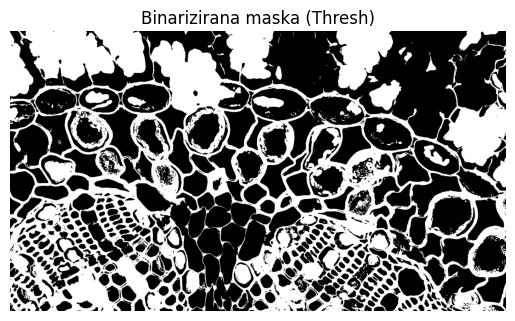

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def prikazi(img, naslov=""):
    if len(img.shape) == 3:
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap='gray')
    plt.title(naslov)
    plt.axis('off')
    plt.show()

# Učitavanje slike (maknuo sam kosu crtu ispred naziva)
img = cv.imread('/cells2.jpg')
# ISPRAVAK: Koristi se COLOR_BGR2GRAY
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Binarno pragiranje (Otsu metoda)
ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

prikazi(thresh, "Binarizirana maska (Thresh)")

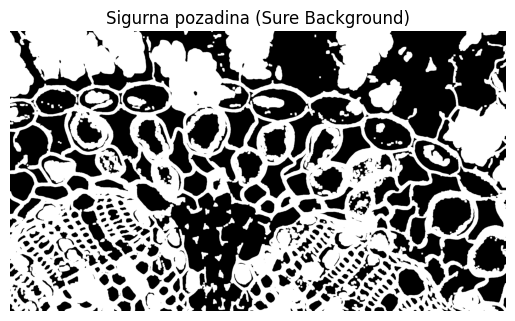

In [6]:
# Uklanjanje sitnog šuma (Opening)
kernel = np.ones((3,3), np.uint8)
opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations=2)

# Određivanje sigurne pozadine (Dilatacija)
sure_bg = cv.dilate(opening, kernel, iterations=3)

prikazi(sure_bg, "Sigurna pozadina (Sure Background)")

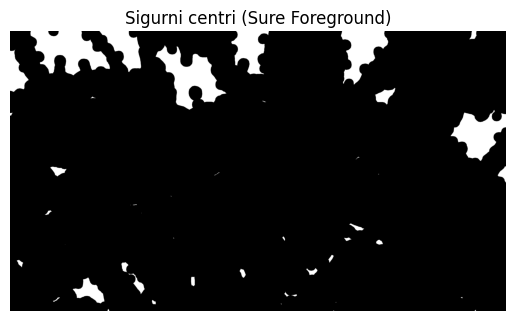

In [7]:
# Transformacija udaljenosti
dist_transform = cv.distanceTransform(opening, cv.DIST_L2, 5)

# Uzimanje samo onih dijelova koji su sigurno u sredini objekta
ret, sure_fg = cv.threshold(dist_transform, 0.2 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)

prikazi(sure_fg, "Sigurni centri (Sure Foreground)")

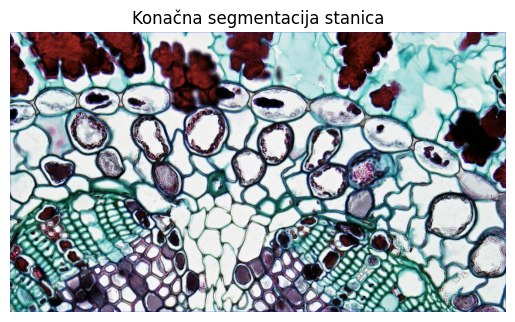

In [8]:
# Pronalaženje nepoznate regije (granice)
unknown = cv.subtract(sure_bg, sure_fg)

# Označavanje svakog objekta posebnim brojem
ret, markers = cv.connectedComponents(sure_fg)

# Dodajemo 1 da pozadina ne bude 0
markers = markers + 1
# Označavanje granica nulom da ih Watershed popuni
markers[unknown == 255] = 0

# Primjena Watershed algoritma
markers = cv.watershed(img, markers)

# Crtanje crvenih rubova na originalnoj slici
img[markers == -1] = [255, 0, 0]

prikazi(img, "Konačna segmentacija stanica")